![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<AxesSubplot:title={'center':'Sentiminetos por aerolínea'}, xlabel='airline'>

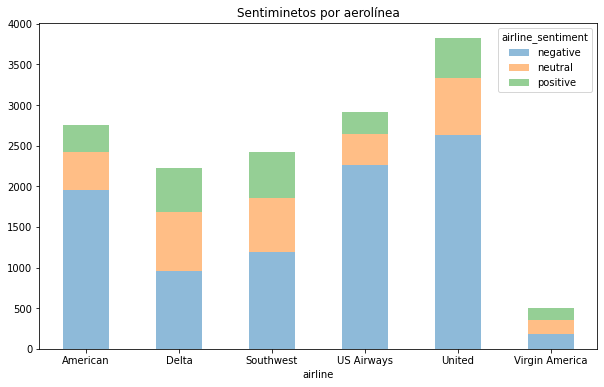

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
# y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})
y = tweets['airline_sentiment'].map({'negative':0,'neutral':1,'positive':2})


In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [71]:
dict_score = {}
validacion_cruzada = {}

from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_jobs=-1) #class_weight{“balanced”, “balanced_subsample”} ,class_weight='balanced' No hubo mejoras significativas al balancear 
cv = CountVectorizer( lowercase = True, ngram_range=(3,3)) #, max_features = 100000

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

params = [{'min_samples_leaf': [1,2], # incialmente se hizo un entrenamiento con [2, 3] y 2 es el mejor
         'n_estimators': [100,1000]}] # inicialmente se hizo un entrenamiento con [500, 1000] y 1000 es el mejor, si se dejaran los 4 parámetros, serían 20 modelos a evaluar con cv = 5
rf_GCV = GridSearchCV(rf,param_grid=params,scoring='accuracy',cv=5, n_jobs = -1, verbose = 3)
rf_GCV.fit(X_train_cv, y_train)
y_pred = rf_GCV.predict(X_test_cv)
dict_score['CountVectorizer'] = accuracy_score(y_test, y_pred)

# En el próximo command se guardan los resultados, ya que se debìa ajustar algo en el índice.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


IndexError: index 4 is out of bounds for axis 0 with size 4

In [77]:
buscar = rf_GCV.best_params_
buscar
indice = rf_GCV.cv_results_['params'].index(buscar)
indice
validacion_cruzada['CountVectorizer'] = [rf_GCV.cv_results_[f'split{i}_test_score'][indice] for i in range(0,5)]
accuracy_score(y_test, y_pred)
# ya entrenado el modelo solamente era guardar los resultados en los diccioanarios que sirven para comparar los modelos

0.6899834437086093

array([[2972,   59,   54],
       [ 818,  143,   23],
       [ 533,   13,  217]], dtype=int64)

0    3085
1     984
2     763
Name: airline_sentiment, dtype: int64

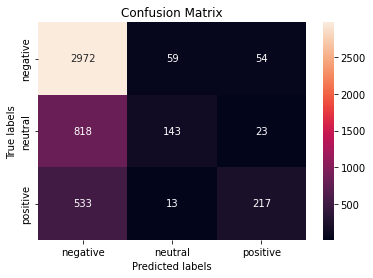

In [12]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
labels = ['negative','neutral','positive']
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
display(confusion_matrix(y_test, y_pred))
display(pd.DataFrame(y_test).reset_index().airline_sentiment.value_counts())


Al aplicar el método CountVectorizer() se obtiene una matriz de conteos de tokens, resultado de la tokenización que se le haya especificado sobre el conjunto de datos.
En este caso se realizó con trigramas sobre los datos para clasificar las palabras-terminos más importantes en TF-IDF.
Al correr un modelo de RandomForest sobre esta data, se halló que tiene una precisión de 68.97% en promedio, que lo cataloga como un modelo aceptable.


Al revisar la matriz de confusión, se observa que el modelo está clasificando de una mejor forma los sentimientos negativos, dado que lo que se pesa es el "accuracy". La peor clasificación es sobre las calificaciones neutrales.
Esto es debido a que la tokenización realizada no tiene en cuenta ningún tipo de preprocesamiento adicional, como la remoción de stop-words o la lematización.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

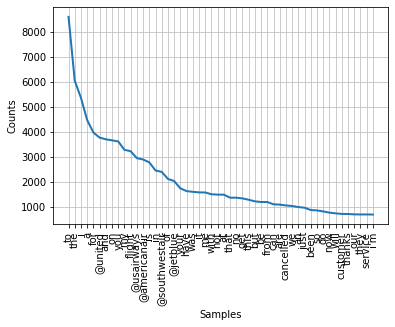

In [20]:
import nltk
import re

palabras = " ".join(tweets['text']).split()
tokens = [i.lower() for i in palabras]
tokens
freq_dist = nltk.FreqDist(tokens)
freq_dist.plot(50, cumulative=False)

# emoticones = [
#     ':)', ':D', ':(', ':/', ':\\', ':p', ':P', ':o', ':O', ';)', ';(', ':-)', ':-D', ':-(', ':-/', ':-p', ':-P', ':-o', ':-O', ';-)', ';-(',
#     ':-]', ':-[', ':-|', ':-$', ':-*', ':\'(', ':\'-(', ':-@', ':^)', '|-O', ':3', '8-)', '8-|', '8-(', '8-D', 'B-)', 'B|', 'B-D', 'B-)','<3'
# ]
# emoticones_regex = [re.escape(emoticon) for emoticon in emoticones]
# token_pattern = re.compile(r'\b\w+\b|\#\w+|\@\w+|{}'.format("|".join(emoticones_regex)))

palabras_frecuentes = pd.DataFrame(freq_dist.keys(),freq_dist.values()).sort_index(ascending=False)
import nltk
from nltk.corpus import stopwords
stop_words_nltk = stopwords.words('english')
# hashtag = palabras_frecuentes[palabras_frecuentes[0].str.contains("#")]
# for i in hashtag:
#     stop_words_nltk.append(i)



In [21]:
# Celda 2
rf = RandomForestClassifier(n_jobs=-1) #class_weight{“balanced”, “balanced_subsample”} ,class_weight='balanced'
cv = CountVectorizer( lowercase = True, ngram_range=(3,3),  stop_words=stop_words_nltk) # stop_words="english" #stop_words=stop_words_nltk, token_pattern = token_pattern

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

params = [{'min_samples_leaf': [1,2], # se ejecuta con los mejores parámetros de la versión inicial
         'n_estimators': [100,1000]}] # se ejecuta con los mejores parámetros de la versión inicial
rf_GCV = GridSearchCV(rf,param_grid=params,scoring='accuracy',cv=5, n_jobs = -1, verbose = 3)
rf_GCV.fit(X_train_cv, y_train)
y_pred = rf_GCV.predict(X_test_cv)
dict_score['CountVectorizer+StopWords'] = accuracy_score(y_test, y_pred)
buscar = rf_GCV.best_params_
indice = rf_GCV.cv_results_['params'].index(buscar)
validacion_cruzada['CountVectorizer+StopWords'] = [rf_GCV.cv_results_[f'split{i}_test_score'][indice] for i in range(0,5)]
validacion_cruzada

accuracy_score(y_test, y_pred)

#con emoticones y separando # y @ 0.6937086092715232
# Quitando hashtags 0.6396937086092715


Fitting 5 folds for each of 4 candidates, totalling 20 fits


0.6399006622516556

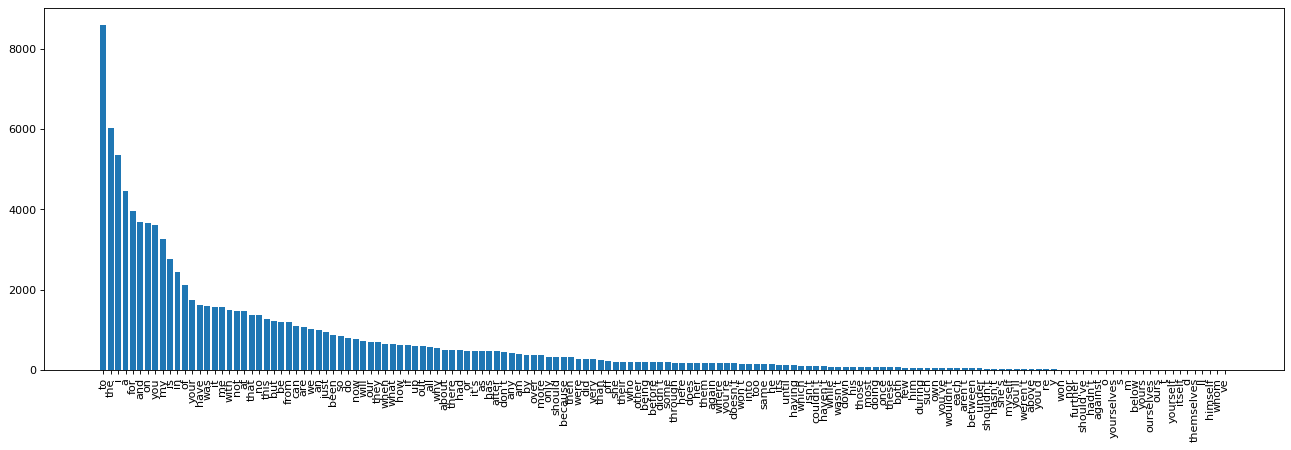

In [15]:
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)
coincidencias = set(stop_words_nltk) & set(palabras_frecuentes[0])

freq_dist_coincidencia = {i:j  for i,j in freq_dist.items() if i in coincidencias }
freq_dist_coincidencia = dict(sorted(freq_dist_coincidencia.items()))

ordenado = pd.DataFrame(freq_dist_coincidencia.keys(),freq_dist_coincidencia.values()).sort_index(ascending=False).reset_index().rename(columns={0:"palabra", 'index':"valor"})

plt.bar(data=ordenado,x='palabra',height='valor')
plt.xticks(rotation=90);

En este punto se corrió el modelo Random Forest sobre la data, pero, además de aplicar CountVectorizer por trigramas, se le aplicó la remoción de stop-words. Estas son palabras comunes en el idioma, que no aportan ningún tipo de distinción a los tweets negativos o positivos, pues están en las dos categorías. En este caso se realizó un proceso adicional con el objetivo de mejorar el desempeño: 
La creación de una expresión regular para la inclusión de emoticiones y diferenciación de los hasthag con cuentas de usuario, en promedio mejoró un 5% el modelo; también, se hicieron ejecicios incluyendo como stopwords los hashtag, ya que pueden generar ruidos al modelo (si un hashtag ya está motivado para una calificación negativa, este va a tener un gran peso en el modelo, pero no es una palabra que realmente se use).

Se concluye que hay palabras que están en los stopwords y que ayudan al contexto del mensaje del Tweet. En el gráfico anterior se muestra la forma en que intervienen las stopwords, se puede observar que todas tienen una frecuncia muy alta sobre los tweets. De este listado de palabras, se observa que la palabra **not** que es el auxiliar para construir palabras negativas. Sin tener certeza de lo que está sucediendo, se debería analizar las stopwords que están influyendo para que baje el rendimiendo del modelo. Con todas estas trabas, se tiene un modelo con un 'accuracy' de 0.6399.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [16]:
#nltk.download()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dfgom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [79]:
# Celda 3

rf = RandomForestClassifier(n_jobs=-1) #class_weight{“balanced”, “balanced_subsample”} ,class_weight='balanced'

wordnet_lemmatizer = WordNetLemmatizer()


def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos="v") for word in words]
cv = CountVectorizer( lowercase = True, ngram_range=(3,3), analyzer=split_into_lemmas)

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

params = [{'min_samples_leaf': [1,2], # se ejecuta con los mejores parámetros de la versión inicial
         'n_estimators': [100,1000]}] # se ejecuta con los mejores parámetros de la versión inicial
rf_GCV = GridSearchCV(rf,param_grid=params,scoring='accuracy',cv=5, n_jobs = -1, verbose = 3)
rf_GCV.fit(X_train_cv, y_train)
y_pred = rf_GCV.predict(X_test_cv)
dict_score['CountVectorizer+Lematización'] = accuracy_score(y_test, y_pred)

buscar = rf_GCV.best_params_
buscar
indice = rf_GCV.cv_results_['params'].index(buscar)
indice
validacion_cruzada['CountVectorizer+Lematización'] = [rf_GCV.cv_results_[f'split{i}_test_score'][indice] for i in range(0,5)]
accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


0.7640728476821192

Se puede ver que al realizar el proceso de lematización del dataset, además de aplicar CountVectorizer por trigramas, se obtuvo un desempeño mucho mejor que en los otros dos puntos del taller. Este proceso convierte las palabras a su versión más básica de diccionario, para luego reotrnar un dataset con palabras más homogéneas, que pueden ser clasificadas más fácilmente según la variable objetivo. En este taller se usó el método con verbos. Por ejemplo, los tweets con tokens negativos como "delayed", "delays" o "delaying" se convierten en "delay", de modo que la palabra "delay" se convierte en un token más significativo dentro del dataset, al incrementarse su frecuencia. Dada su asociación con sentimientos negativos en la variable objetivo, se vuelve un buen predictor de un tweet negativo. El desempeño usando esta técnica es el mejor de los modelos corridos hasta el momento, con un 76.4% de precisión en promedio. 

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [92]:
# Celda 4
import re
from sklearn.model_selection import GridSearchCV
emoticones = [
    ':)', ':D', ':(', ':/', ':\\', ':p', ':P', ':o', ':O', ';)', ';(', ':-)', ':-D', ':-(', ':-/', ':-p', ':-P', ':-o', ':-O', ';-)', ';-(',
    ':-]', ':-[', ':-|', ':-$', ':-*', ':\'(', ':\'-(', ':-@', ':^)', '|-O', ':3', '8-)', '8-|', '8-(', '8-D', 'B-)', 'B|', 'B-D', 'B-)','<3'
]
emoticones_regex = [re.escape(emoticon) for emoticon in emoticones]
token_pattern = re.compile(r'\b\w+\b|\#\w+|\@\w+|{}'.format("|".join(emoticones_regex)))

rf = RandomForestClassifier(n_jobs=-1)

wordnet_lemmatizer = WordNetLemmatizer()

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos="v") for word in words]

cv = CountVectorizer( lowercase = True, ngram_range=(3,3),analyzer=split_into_lemmas, stop_words="english",token_pattern = token_pattern) #, , 

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

params = [{'min_samples_leaf': [1,2], # se ejecuta con los mejores parámetros de la versión inicial
         'n_estimators': [100,1000]}] # se ejecuta con los mejores parámetros de la versión inicial
rf_GCV = GridSearchCV(rf,param_grid=params,scoring='accuracy',cv=5, n_jobs = -1, verbose = 3)
rf_GCV.fit(X_train_cv, y_train)
y_pred = rf_GCV.predict(X_test_cv)


dict_score['CountVectorizer+Lematización+StopWords+Emoticons'] = accuracy_score(y_test, y_pred)
buscar = rf_GCV.best_params_
buscar
indice = rf_GCV.cv_results_['params'].index(buscar)
indice
validacion_cruzada['CountVectorizer+Lematización+StopWords+Emoticons'] = [rf_GCV.cv_results_[f'split{i}_test_score'][indice] for i in range(0,5)]
accuracy_score(y_test, y_pred)

# 0.7640728476821192 y 0.7588990066225165

# 1 y 1000: 0.7638658940397351

Fitting 5 folds for each of 4 candidates, totalling 20 fits


0.7622102649006622

En este punto se combinaron las técnicas usadas hasta el momento. Se realizó:
* Aplicación CountVectorizer por trigramas
* Eliminación de stop-words y creando una expresión regular para que identifique emoticonos
* Lematización del texto con verbos

Se puede ver que el resultado no tuvo una mejora considerable, frente al del punto anterior (76.22% vs. 76.4%). Tal vez sea necesario probar con otros hiperparámetros en la búsqueda, ya que cambiando los datos no funcionan los mismos hiperparámetros. Así mismo, esto puede ser debido a que la base de datos usada es de tweets, de modo que la gente intenta usar menos palabras comunes, pues Twitter tiene un límite de caracteres de 240 por trino. Este límite le impide a la gente explayarse y usar frases largas o incluso completas.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

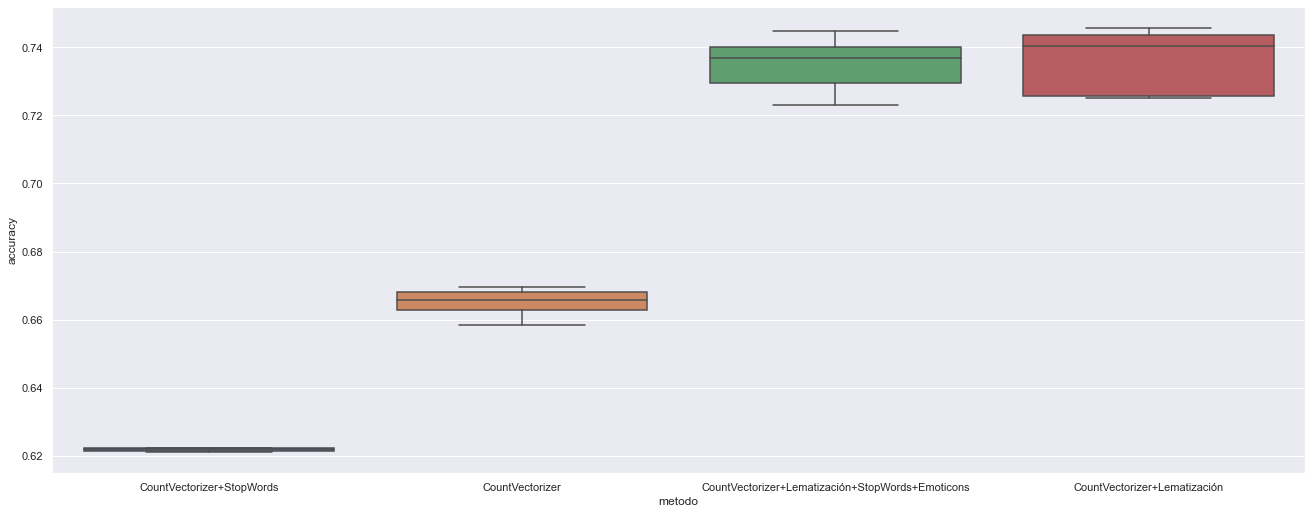

In [94]:
import seaborn as sns
#pd.DataFrame.from_dict(dict_score_arr)
# figure(figsize=(20, 6), dpi=80)
sns.set(rc={'figure.figsize':(20,8)})
sns.boxplot(data = pd.melt(pd.DataFrame.from_dict(validacion_cruzada)), x="variable", y="value")

plt.xlabel('metodo')
plt.ylabel('accuracy');
# plt.xticks(rotation=45);

,CountVectorizer+Lematización+StopWords+Emoticons,CountVectorizer+Lematización,CountVectorizer+StopWords,CountVectorizer
0,0.76221,0.764073,0.639901,0.689983


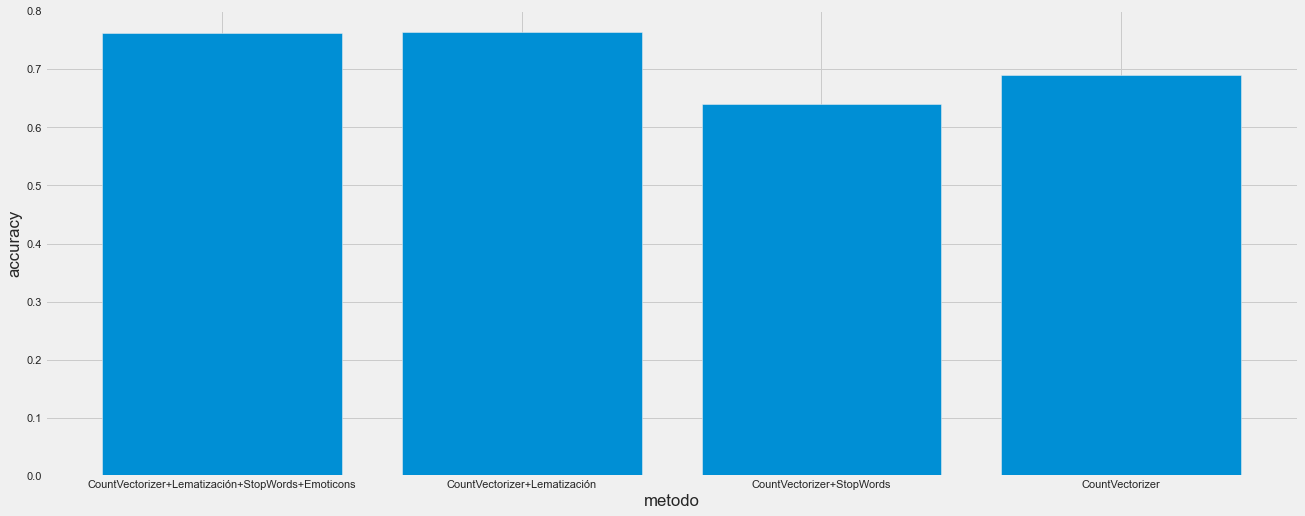

In [95]:
bar_data = pd.DataFrame(dict_score, index=[0])

display(bar_data)

plt.style.use('fivethirtyeight')
plt.bar(x=bar_data.columns, height=bar_data.values[0])

plt.xlabel('metodo')
plt.ylabel('accuracy');
# plt.xticks(rotation=45);

Como se muestra en las gráficas, los mejores modelos para este dataset fueron los que usaron lematización. A pesar de que el modelo que es countvectorizer+lematización el que mejor se comportó, el modelo que tiene countvectorizer+lematización+stopwords es el mas estable en la validación cruzada, como se observa en los diagramas de caja. En todos los casos se hizo conteo de tokens por trigramas, pero los modelos que incluyeron el paso de lematización obtuvieron los mejores puntajes de precisión de la clasificación. Como se discutió antes, la lematización le da mayor valor a la data debido a que homogeniza las palabras de los tweets y les da más significancia respecto a la variable objetivo. Lematizar es buena práctica para este tipo de análisis pues nos otorga data más fácil de analizar. A pesar de que es un método computacionalmente más complejo que el stemming y que la eliminación de stop-words, en casos como el de este taller esto no es una desventaja, pues tenemos un número de datos no demasiado grande. 

Por otro lado, se puede ver que el desempeño del modelo no mejoró significativamente usando la combinación de los métodos de preprocesamiento. Esto puede ser debido a que el dataset que se tiene está compuesto de trinos, que tienen un límite de caracteres. Si alguien quiere quejarse de una aerolínea públicamente, no usará lenguaje formal y frases completas, sino que puede ser suficiente con trinar algo como "@united sucks". A este tweet no se le pueden eliminar stop-words, ya que no tiene. Esto significa que eliminar stop-words de los tweets no le aporta tanto valor a la data como la lematización.

Respecto al modelo con peor desempeño, este fue el método de eliminación de stop-words únicamente. Aunque es cierto que los token se vuelven más significativos al eliminar las palabras comunes que las dos categorías tienen en común, se considera, como se dijo antes, que los tweets tienen una baja incidencia de stop-words. También se considera posible que eliminar stop-words únicamente cause que haya muchos trigramas singulares en el dataset, de modo que se vuelve más difícil la clasificación de los tweets. Por ejemplo un tweet como "@united keeps playing us and I'm so over it" se convierte en "keeps playing over", que es un tweet con palabra difícilmente asociables a la negatividad y, además, que puede que se repitan muy poco a lo largo del dataset. La lematización pondría este tweet al mismo nivel de significancia que todos los que contienen "keep" y "play", de modo que aumenta la probabilidad de una mejor clasificación, incluso a pesar de que no se asocien fácilmente a sentimientos negativos. 